Seeing how much inclination angle effect curve fitting by: 
1. Fitting theoretical distribution that do not include inlination angle (Maggiore distrbutions) to distributions that do include different inclination angles (Moreno-Garrido distributions) (other notebook)
2. Including inclination angle as a parameter to fit to from spectogram "data" 

In [1]:
%%capture output
%run spectrogram_gne_functions.ipynb

In [2]:
# Define parameters
m1=2
m2=2
fftlen=1
nMax=15
returnAll = False 

e_inj = [0.1, 0.3, 0.5, 0.7]
theta_inj = np.arange(0, 0.55, 0.05)*np.pi

nMax=15
returnAll = False 

In [3]:
# Curve fitting and plotting results 

e_results = {} 
theta_results = {}

for e0 in e_inj:    
    for theta0 in theta_inj: 
        
        e_fit, theta_fit = bestFitEccMGWithInclination(e0, m1, m2, theta0, fftlen, nMax, returnAll)
        
        key = (e0, theta0)
        e_results[key] = e_fit
        theta_results[key] = theta_fit 

/home/pycbc/pycbc-software/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
/home/pycbc/pycbc-software/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/home/pycbc/pycbc-software/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/pycbc/pycbc-software/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


Injected e0 = 0.1
Recovered e0 = 0.110097228069
Injected theta = 0.0
Recovered theta = 1.40495128981
Injected e0 = 0.1
Recovered e0 = 0.11009662269
Injected theta = 0.157079632679
Recovered theta = 1.40176779007
Injected e0 = 0.1
Recovered e0 = 0.11009477815
Injected theta = 0.314159265359
Recovered theta = 1.39250530766
Injected e0 = 0.1
Recovered e0 = 0.110091590967
Injected theta = 0.471238898038
Recovered theta = 1.37793161665
Injected e0 = 0.1
Recovered e0 = 0.110086959462
Injected theta = 0.628318530718
Recovered theta = 1.35895095382
Injected e0 = 0.1
Recovered e0 = 0.110080085276
Injected theta = 0.785398163397
Recovered theta = 1.33716891599
Injected e0 = 0.1
Recovered e0 = 0.110070396251
Injected theta = 0.942477796077
Recovered theta = 1.31361834569
Injected e0 = 0.1
Recovered e0 = 0.110056378212
Injected theta = 1.09955742876
Recovered theta = 1.28994555418
Injected e0 = 0.1
Recovered e0 = 0.110036369786
Injected theta = 1.25663706144
Recovered theta = 1.2681112916
Injected

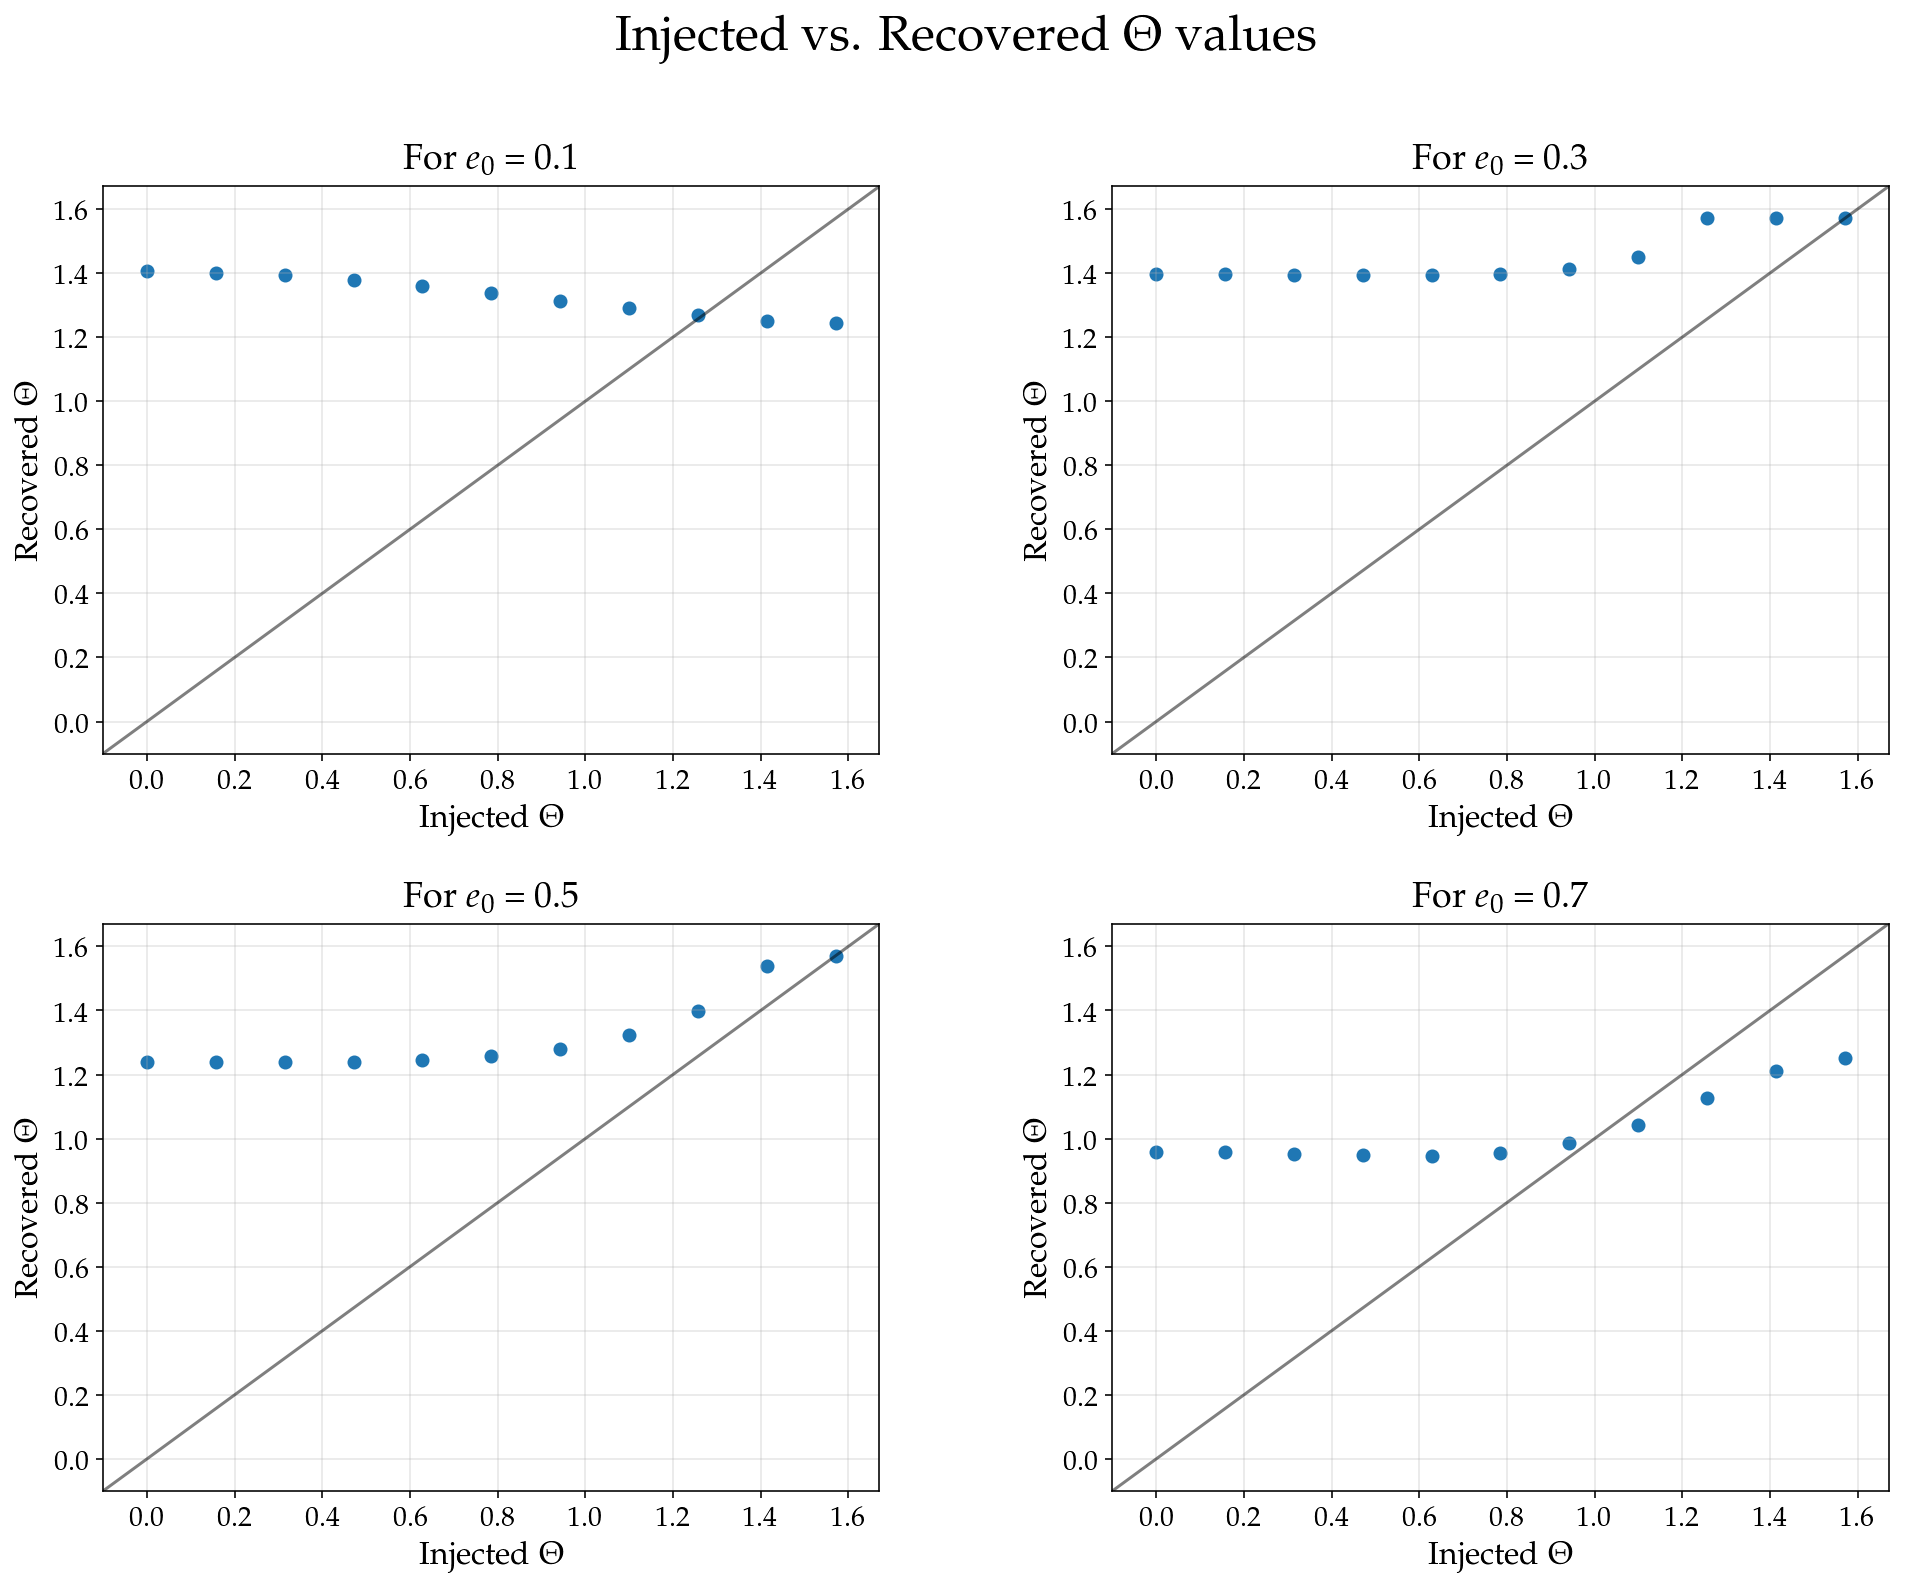

In [9]:
# Plotting results 

diag = np.arange(-0.1,2.0,0.1)
plt.figure(figsize=(16,12))
plt.suptitle("Injected vs. Recovered $\Theta$ values", fontsize=25)

for i, e0 in enumerate(e_inj):   
        
    theta_results_arr = []
    
    for theta0 in theta_inj: 
        key = (e0, theta0) 
        theta_results_arr.append(theta_results[key])
    
    plt.subplot(2,2,i+1)
    plt.plot(diag, diag, color='k', alpha=0.5)
    plt.scatter(theta_inj, theta_results_arr)
    plt.title(r"For $e_0$ = {}".format(e0), fontsize=18)
    plt.xlabel(r"Injected $\Theta$", fontsize=16)
    plt.ylabel(r"Recovered $\Theta$", fontsize=16)
    plt.xlim(-0.1, np.pi/2.0+0.1)
    plt.ylim(-0.1, np.pi/2.0+0.1)
    plt.grid(alpha=0.3)

plt.subplots_adjust(wspace=0.3, hspace=0.3)

[0.11009722806889848, 0.33494927258732488, 0.57883767825764254, 0.79210161876687668]
[0.11009159096723345, 0.3349020117621791, 0.57883473446690625, 0.79171631938822795]
[0.11005637821225013, 0.33463546827682372, 0.57958560970157502, 0.78988587112368713]
[0.11000023307386622, 0.33486595968974558, 0.58099410243009753, 0.78827900398786699]


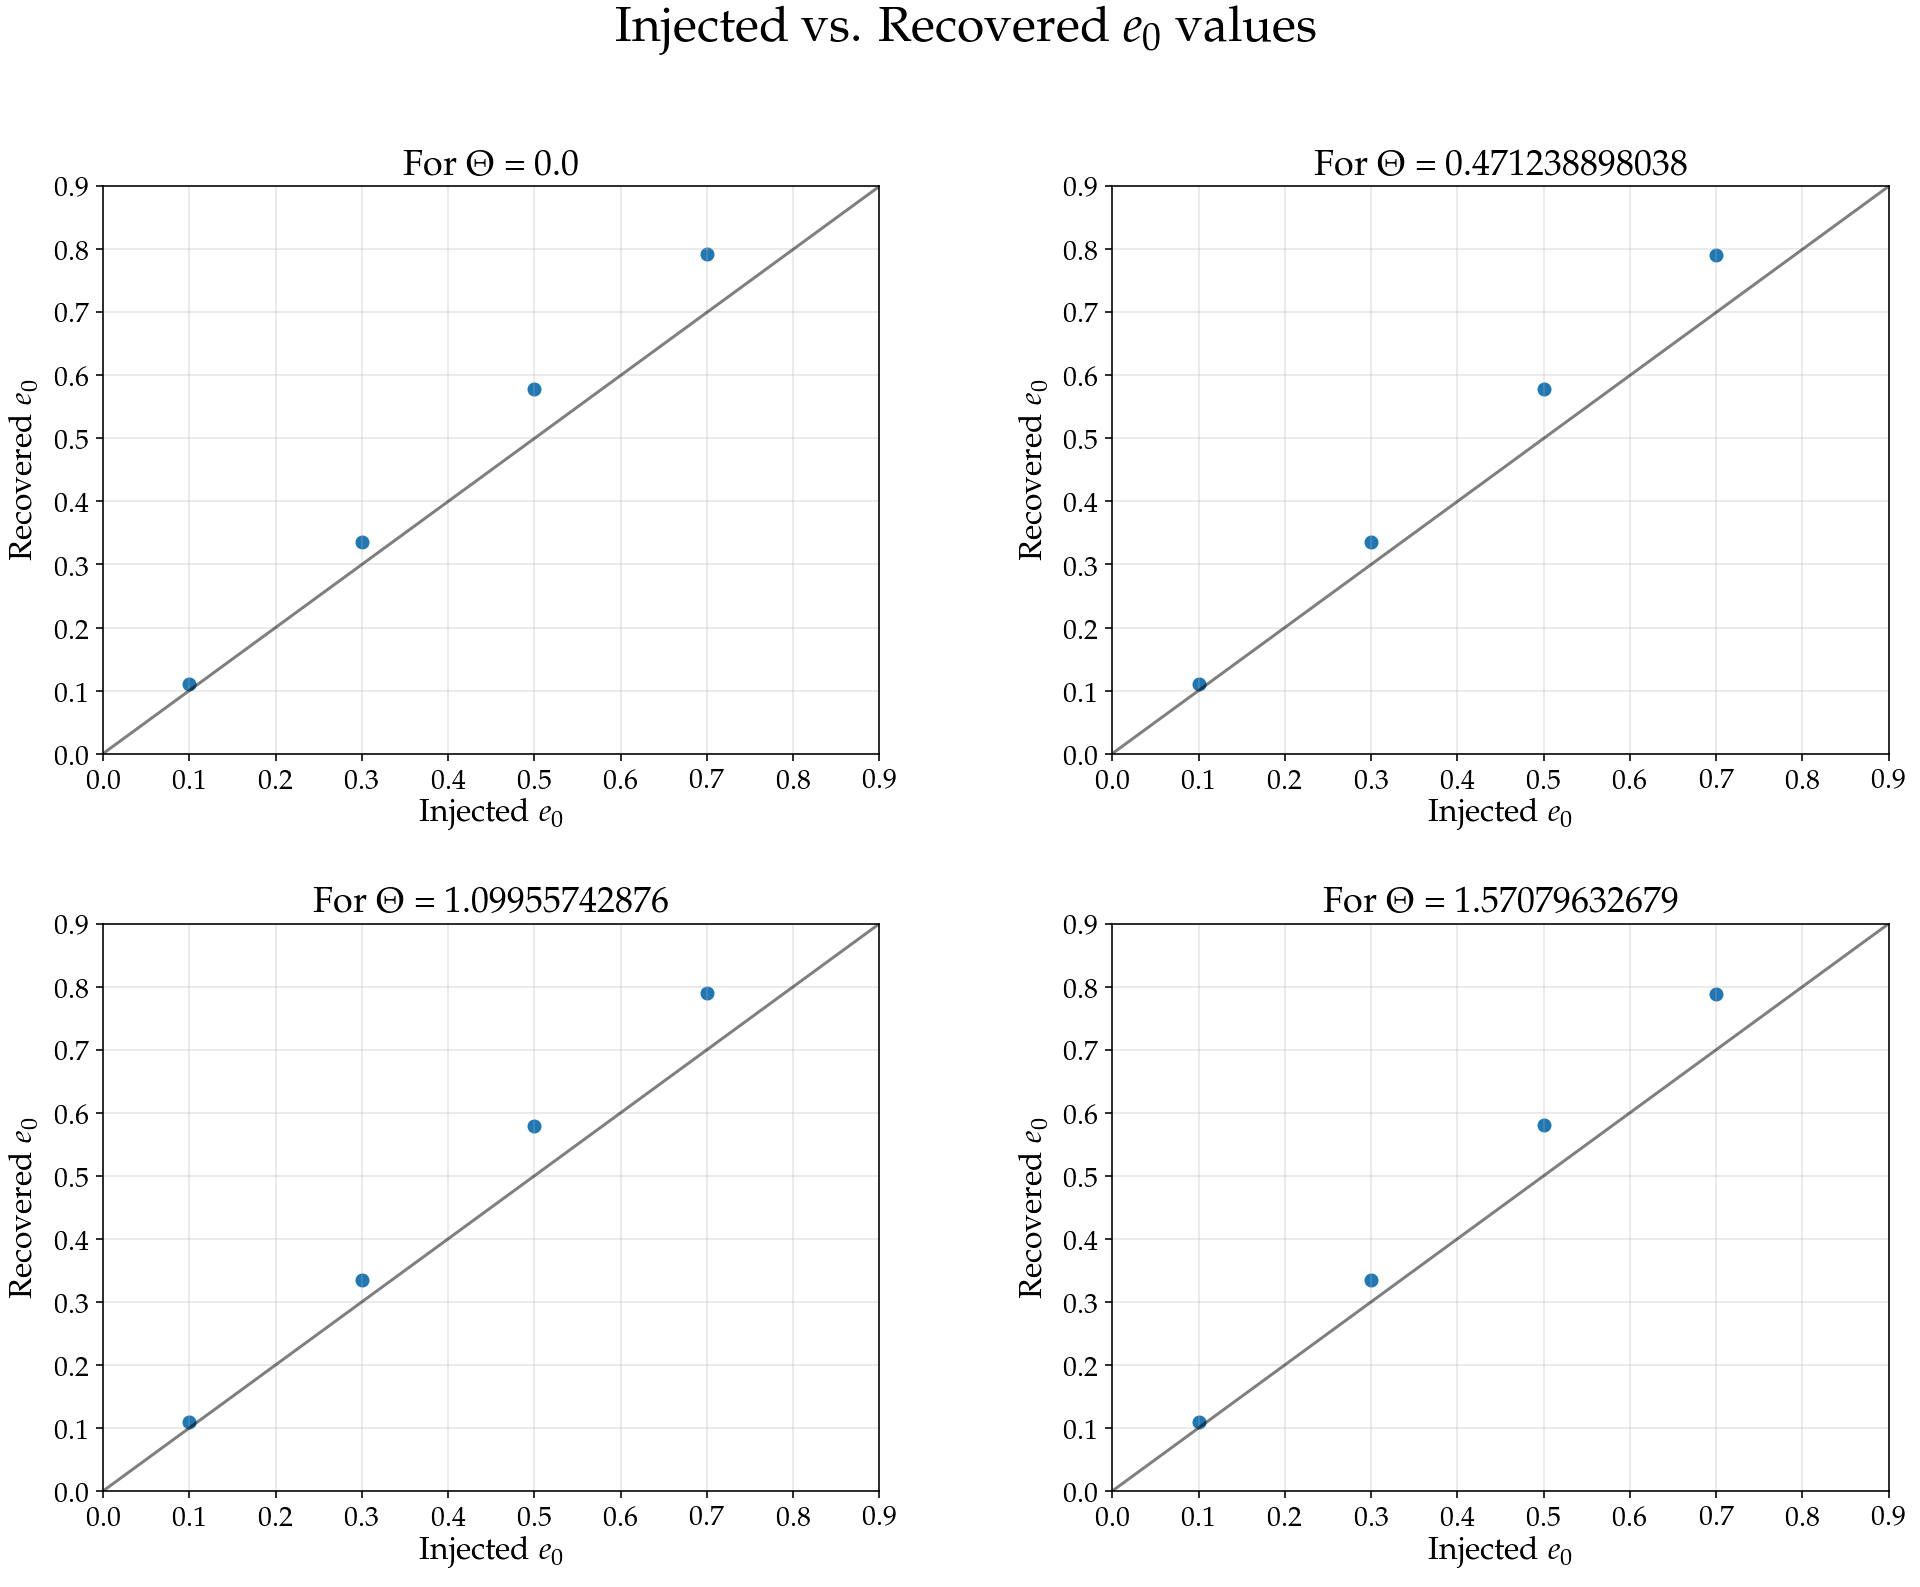

In [14]:
diag = np.arange(-0.1,2.0,0.1)
plt.figure(figsize=(16,12))
plt.suptitle("Injected vs. Recovered $e_0$ values", fontsize=25)

for n,i in enumerate([0,3,7,-1]):   
        
    e_results_arr = []
    theta0 = theta_inj[i]
    
    for e0 in e_inj: 
        key = (e0, theta0) 
        e_results_arr.append(e_results[key])
        
    plt.subplot(2,2,n+1)
    plt.plot(diag, diag, color='k', alpha=0.5)
    plt.scatter(e_inj, e_results_arr)
    plt.title(r"For $\Theta$ = {}".format(theta0), fontsize=18)
    plt.xlabel(r"Injected $e_0$", fontsize=16)
    plt.ylabel(r"Recovered $e_0$", fontsize=16)
    plt.xlim(0, 0.9)
    plt.ylim(0, 0.9)
    plt.grid(alpha=0.3)
    
    print e_results_arr

plt.subplots_adjust(wspace=0.3, hspace=0.3)